# Place N queens on an NxN board

Note that there are no solutions for n=2 and 3.

In [14]:
def queens(n, loc=None):
    """Find one solution for the queens problem."""
    if loc is None: 
        loc = {}
    elif len(loc)==n:
        return loc
    else: 
        loc = loc.copy()
    taken = set([val for key,val in loc.items()])
    
    def not_diagonal(loc,i,j):
        for key,val in loc.items():
            if abs(key-i)==abs(val-j):
                return False
        return True
    
    i = len(loc)
    out = None # Pessimistic default
    for j in range(n):
        if j not in taken and not_diagonal(loc,i,j):
            loc[i] = j
            out = queens(n, loc)
            if out is not None: # Successful placement
                break # Done
    return out

def visualize(q):
    """Visualize the queens solution."""
    print(q)
    n = len(q)
    for i in range(n):
        for j in range(n):
            if q[i]==j:
                print('Q', end='')
            else:
                print('.', end='')
        print()

q = queens(9)
visualize(q)

{0: 0, 1: 2, 2: 5, 3: 7, 4: 1, 5: 3, 6: 8, 7: 6, 8: 4}
Q........
..Q......
.....Q...
.......Q.
.Q.......
...Q.....
........Q
......Q..
....Q....


Now all options.

Let's say that we always get only one prior position, but return all possible after positions.

Which means that we need to run another concatenator loop inside.

And let's use a simple array of positions instead of an array.

In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [50]:
def visuals(qs):
    """Nice graphic visual."""
    fig = plt.figure(figsize=(10,10))
    nplot = np.ceil(np.sqrt(len(qs)))
    mplot = np.ceil(len(qs)/nplot)
    n = len(qs[0])
    for iplot in range(len(qs)):
        plt.subplot(nplot, mplot, iplot+1)    
        img = np.zeros(shape=(n,n))
        for i in range(n):
            img[i,qs[iplot][i]] = 1
        plt.imshow(1-img, cmap='gray')
        plt.xticks([])
        plt.yticks([])

[0, 2, 4, 6, 1, 3, 5]
[0, 3, 6, 2, 5, 1, 4]
[0, 4, 1, 5, 2, 6, 3]
[0, 5, 3, 1, 6, 4, 2]
[1, 3, 0, 6, 4, 2, 5]
[1, 3, 5, 0, 2, 4, 6]
[1, 4, 0, 3, 6, 2, 5]
[1, 4, 2, 0, 6, 3, 5]
[1, 4, 6, 3, 0, 2, 5]
[1, 5, 2, 6, 3, 0, 4]
[1, 6, 4, 2, 0, 5, 3]
[2, 0, 5, 1, 4, 6, 3]
[2, 0, 5, 3, 1, 6, 4]
[2, 4, 6, 1, 3, 5, 0]
[2, 5, 1, 4, 0, 3, 6]
[2, 6, 1, 3, 5, 0, 4]
[2, 6, 3, 0, 4, 1, 5]
[3, 0, 2, 5, 1, 6, 4]
[3, 0, 4, 1, 5, 2, 6]
[3, 1, 6, 4, 2, 0, 5]
[3, 5, 0, 2, 4, 6, 1]
[3, 6, 2, 5, 1, 4, 0]
[3, 6, 4, 1, 5, 0, 2]
[4, 0, 3, 6, 2, 5, 1]
[4, 0, 5, 3, 1, 6, 2]
[4, 1, 5, 2, 6, 3, 0]
[4, 2, 0, 5, 3, 1, 6]
[4, 6, 1, 3, 5, 0, 2]
[4, 6, 1, 5, 2, 0, 3]
[5, 0, 2, 4, 6, 1, 3]
[5, 1, 4, 0, 3, 6, 2]
[5, 2, 0, 3, 6, 4, 1]
[5, 2, 4, 6, 0, 3, 1]
[5, 2, 6, 3, 0, 4, 1]
[5, 3, 1, 6, 4, 2, 0]
[5, 3, 6, 0, 2, 4, 1]
[6, 1, 3, 5, 0, 2, 4]
[6, 2, 5, 1, 4, 0, 3]
[6, 3, 0, 4, 1, 5, 2]
[6, 4, 2, 0, 5, 3, 1]


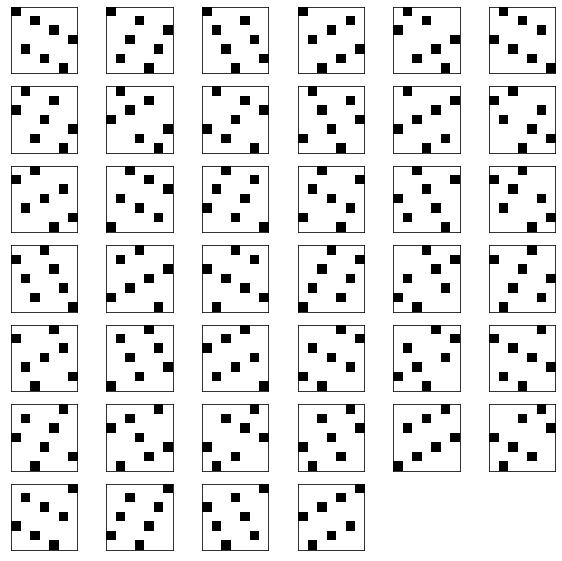

In [52]:
def queens2(n, loc=None):
    """Find all solutions for the queens problem."""
    if loc is None: 
        loc = []
    if len(loc)==n:
        return [loc]
    
    def not_diagonal(loc,newi,newj):
        for i in range(len(loc)):
            if abs(newi-i)==abs(newj-loc[i]):
                return False
        return True

    out = [] # Will collect here: a list of lists
    i = len(loc)      
    for j in range(n):
        if j not in loc and not_diagonal(loc,i,j):
            out += queens2(n, loc+[j])
    return out

qs = queens2(7)
visuals(qs)
for q in qs: 
    print(q)